# CONJUNTO DE DEJERCICIOS 
## Problema de Bisección

1. Use el método de bisección para encontrar soluciones precisas dentro de $10^{-2}$ para la ecuación:

   $x^3 - 7x^2 + 14x - 6 = 0$

   en cada intervalo:

   a. \[0, 1]  
   b. \[1, 3.2]  
   c. \[3.2, 4] 



In [17]:
def f(x):
    return x**3 - 7*x**2 + 14*x - 6

def bisection_method(a, b, tolerance=1e-2):
    if f(a) * f(b) >= 0:
        print("El método de bisección no puede aplicarse.")
        return None
    
    while (b - a) / 2.0 > tolerance:
        midpoint = (a + b) / 2.0
        if f(midpoint) == 0:
            return midpoint  # Hemos encontrado una solución exacta
        elif f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
            
    return (a + b) / 2.0

# Intervalos
intervals = [(0, 1), (1, 3.2), (3.2, 4)]

# Aplicar el método de bisección a cada intervalo
solutions = {}
for i, (a, b) in enumerate(intervals, start=1):
    solution = bisection_method(a, b)
    solutions[f"Intervalo {i} [{a}, {b}]"] = solution

solutions


{'Intervalo 1 [0, 1]': 0.5859375,
 'Intervalo 2 [1, 3.2]': 3.0023437500000005,
 'Intervalo 3 [3.2, 4]': 3.41875}

# 4) Problema

a. Dibuje las gráficas para $y = x^2 - 1$ y $y = e^{-x}$.  
b. Use el método de bisección para encontrar una aproximación dentro de $10^{-3}$ para un valor
en [-2, 0] con $x^2 - 1 = e^{1-x^2}$.



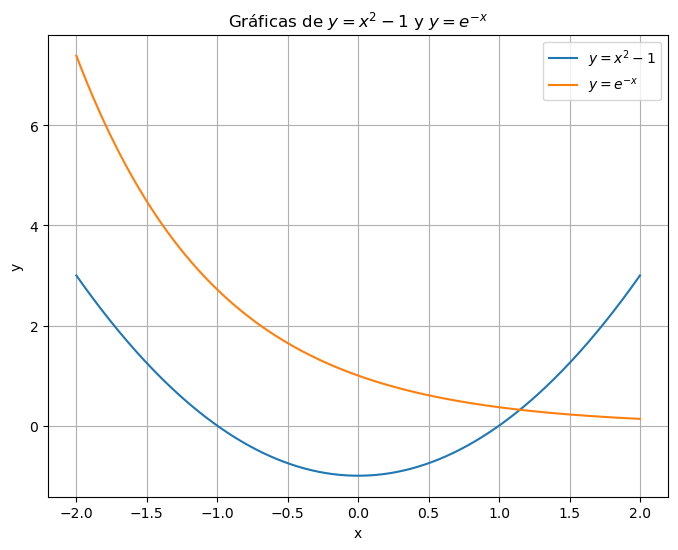

-1.2509765625

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

# Parte a: Graficar y = x^2 - 1 y y = e^(-x)
x_vals = np.linspace(-2, 2, 400)
y1 = x_vals**2 - 1
y2 = np.exp(-x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y1, label=r"$y = x^2 - 1$")
plt.plot(x_vals, y2, label=r"$y = e^{-x}$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráficas de $y = x^2 - 1$ y $y = e^{-x}$")
plt.legend()
plt.grid()
plt.show()

# Parte b: Método de bisección para resolver x^2 - 1 = e^(1 - x^2)
def f(x):
    return x**2 - 1 - exp(1 - x**2)

def bisection_method(a, b, tolerance=1e-3):
    if f(a) * f(b) >= 0:
        print("El método de bisección no puede aplicarse en este intervalo.")
        return None
    
    while (b - a) / 2.0 > tolerance:
        midpoint = (a + b) / 2.0
        if f(midpoint) == 0:
            return midpoint  # Solución exacta encontrada
        elif f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
            
    return (a + b) / 2.0

# Usar el método de bisección en el intervalo [-2, 0]
a, b = -2, 0
solution = bisection_method(a, b)
solution


# EJERCICIOS APLICADOS

## 1) Un abrevadero de longitud $L$ tiene una sección transversal en forma de semicírculo con radio $r$. (Consulte la figura adjunta.) Cuando se llena con agua hasta una distancia \( h \) a partir de la parte superior, el volumen \( V \) de agua es 


$V = L \left( 0.5 \pi r^2 - r^2 \, \text{arcsen} \left( \frac{h}{r} \right) - h \left( r^2 - h^2 \right)^{1/2} \right)$


Suponga que  $L = 10$, ${cm} ,  r = 1 $, ${cm} $ y $ V = 12.4 $, ${cm}^3 $. Encuentre la profundidad del agua en el abrevadero dentro de $0.01 $, ${cm}$.

In [34]:
import math

# Parámetros dados
L = 10  # longitud en cm
r = 1   # radio en cm
V_dado = 12.4  # volumen en cm^3

# Función para el volumen V en función de h
def volumen(h):
    return L * (0.5 * math.pi * r**2 - r**2 * math.asin(h / r) - h * (r**2 - h**2)**0.5)

# Función para aplicar el método de bisección
def biseccion_volumen(V_objetivo, a, b, tolerancia=0.01):
    if volumen(a) * volumen(b) > 0:
        print("No se puede aplicar el método de bisección en este intervalo.")
        return None
    
    while (b - a) / 2.0 > tolerancia:
        midpoint = (a + b) / 2.0
        if volumen(midpoint) == V_objetivo:
            return midpoint
        elif volumen(a) < V_objetivo < volumen(midpoint):
            b = midpoint
        else:
            a = midpoint
            
    return (a + b) / 2.0

# Intervalo inicial de búsqueda para h
a = 0  # mínimo valor posible de h
b = r  # máximo valor posible de h (ya que h no puede ser mayor que r)

# Encontrar la profundidad h para el volumen deseado
h_encontrado = biseccion_volumen(V_dado, a, b)
h_encontrado


0.9921875

## 2. Un objeto que cae verticalmente a través del aire está sujeto a una resistencia viscosa, así como a la fuerza de gravedad. Suponga que un objeto con masa \( m \) cae desde una altura \( s_0 \) y que la altura del objeto después de \( t \) segundos es 

$
s(t) = s_0 - \frac{mg}{k} t + \frac{m^2g}{k^2} \left( 1 - e^{-\frac{-kt}{m}} \right),
$

donde $g = 9.81$, ${m/s}^2$ y $ k $ representa el coeficiente de la resistencia del aire en ${N s/m} $. Suponga $ s_0 = 300 $, ${m} $, $m = 0.25 $,${kg} $ y $ k = 0.1 $, ${N s/m} $. Encuentre, dentro de $ 0.01$, ${segundos} $, el tiempo que tarda un cuarto de kg en golpear el piso.

In [46]:
import numpy as np
from scipy.optimize import bisect

# Definición de constantes
g = 9.81  # m/s^2
s0 = 300  # m
m = 0.25  # kg
k = 0.1   # N s/m

# Definición de la función que representa la altura s(t)
def height(t):
    return s0 - (m * g / k) * t + (m * g / k**2) * (1 - np.exp(-k * t / m))

# Método de bisección para encontrar el tiempo t cuando s(t) = 0
def find_time_to_hit_ground():
    # Intervalo inicial para t (0 a un tiempo razonable, por ejemplo, 100 segundos)
    t_initial = 0
    t_final = 100
    
    # Usar el método de bisección para encontrar la raíz
    time_to_hit_ground = bisect(height, t_initial, t_final)
    
    return time_to_hit_ground

# Encontrar el tiempo que tarda en golpear el piso
time = find_time_to_hit_ground()
print(f"El tiempo que tarda un cuarto de kg en golpear el piso es aproximadamente: {time:.4f} segundos")

El tiempo que tarda un cuarto de kg en golpear el piso es aproximadamente: 22.2310 segundos


# Ejercicios teóricos
1. Use el teorema 2.1 para encontrar una cota para el número de iteraciones necesarias para lograr una aproximación con precisión de $ 10^{-6} $ para la solución de $ x^2 - x - 1 = 0 $ que se encuentra dentro del intervalo $[1, 2]$. Encuentre una aproximación para la raíz con este grado de precisión.

Despejando $ n $ de la desigualdad anterior:

$
2^n \geq \frac{b - a}{10^{-6}}.
$

Calculamos \( b - a = 2 - 1 = 1 \), por lo que tenemos:

$
2^n \geq \frac{1}{10^{-6}} = 10^6.
$

Tomando logaritmo en base 2 en ambos lados:

$
n \geq \log_2(10^6).
$


In [68]:
import math

# Función objetivo
def f(x):
    return x**2 - x - 1

# Cálculo del número mínimo de iteraciones necesarias
precision = 1e-6
a, b = 1, 2
n_min = math.ceil(math.log2((b - a) / precision))
print(f"Número mínimo de iteraciones necesarias: {n_min}")

# Método de bisección
def biseccion(f, a, b, tolerancia):
    if f(a) * f(b) >= 0:
        print("El método de bisección no puede aplicarse.")
        return None
    
    iteracion = 0
    while (b - a) / 2 > tolerancia:
        midpoint = (a + b) / 2.0
        if f(midpoint) == 0:
            return midpoint  # Solución exacta encontrada
        elif f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
        
        iteracion += 1
        if iteracion >= n_min:
            break
            
    return (a + b) / 2.0

# Aproximación de la raíz
raiz_aproximada = biseccion(f, a, b, precision)
print(f"Aproximación de la raíz con precisión de {precision}: {raiz_aproximada}")


Número mínimo de iteraciones necesarias: 20
Aproximación de la raíz con precisión de 1e-06: 1.6180334091186523
